# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<font color='red'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

<font color='red'>Creating custom dataset</font>

In [2]:
# please don't change random_state
# changing n_sampls to 50 for debugging purpose
x, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.8, random_state=15)
# the more class_sep value, points will be separated more, we will have clear cut decision boundary value.
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
# checking the frequency of the target variable.
list(y).count(1),list(y).count(0)

(15096, 34904)

In [4]:
x.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [5]:
#please don't change random state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
list(y_test).count(0),list(y_test).count(1)

(8733, 3767)

# <font color='red' size=5>SGD classifier</font>

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

# eta0 is your r value
# alpha is the Lambda value
# tol is tolerance, the stopping criteria, if sees the difference is lesser than mentioned then algorithm gets stopped
# Though difference between previous iteration loss, and current loss is 1e-3 in 7th iteration, it is running for 11 epoch's 
# because n_iter_no_change was set to 5. change n_iter_no_change=7 then it runs for 13 epoch's

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=x_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.83, NNZs: 15, Bias: -0.282453, T: 37500, Avg. loss: 0.416920
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 15, Bias: -0.421256, T: 75000, Avg. loss: 0.351793
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 15, Bias: -0.522158, T: 112500, Avg. loss: 0.342380
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 15, Bias: -0.599947, T: 150000, Avg. loss: 0.338447
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.15, NNZs: 15, Bias: -0.664380, T: 187500, Avg. loss: 0.336584
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.16, NNZs: 15, Bias: -0.713463, T: 225000, Avg. loss: 0.335459
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 1.18, NNZs: 15, Bias: -0.751239, T: 262500, Avg. loss: 0.334854
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.18, NNZs: 15, Bias: -0.782405, T: 300000, Avg. loss: 0.334445
Total training time: 0.11 seconds.
-- Epoch 9
Norm: 1.19, NNZs: 15, Bias: -0.806457, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights <-- this is W value
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term <-- this is b value

(array([[-0.47567788,  0.19589413, -0.17415821,  0.37900851, -0.24481811,
          0.63622905, -0.49254767, -0.10433643,  0.22645472,  0.19989695,
          0.20952843,  0.0019088 , -0.09266827,  0.37707176,  0.02701887]]),
 (1, 15),
 array([-0.84232715]))

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>






1.  We will be giving you some functions, please write code in that functions only.

2.  After every function, we will be giving you expected output, please make sure that you get that output. 






<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [11]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (dim,1) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w=np.zeros_like(dim)
    b=0
    return w,b

In [12]:
dim=x_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='Red'>Grader function - 1 </font>

In [13]:
dim=x_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
    assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
    return True
grader_weights(w,b)

True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [14]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return (1/(1 + np.exp(-1*z)))

<font color='cyan'>Grader function - 2</font>

In [15]:
def grader_sigmoid(z):
    val=sigmoid(z)
    assert(val==0.8807970779778823)
    return True
grader_sigmoid(2)

True

In [16]:
sigmoid(2)

0.8807970779778823

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [17]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    n=len(y_true)
    loss = 0.0 
    for (y_true,y_pred) in zip(y_true,y_pred):
        loss += ((y_true*np.log10(y_pred)) + ((1-y_true) * np.log10(1-y_pred)))
    loss = -1 *(loss/n)
    return loss

<font color='cyan'>Grader function - 3 </font>

In [18]:
def grader_logloss(true,pred):
    loss=logloss(true,pred)
    assert(loss==0.07644900402910389)
    return True
true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
grader_logloss(true,pred)

True

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t})- \frac{λ}{N}w^{(t)})$ <br>

In [19]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot((w.T),x) + b
    a = y-sigmoid(z)-(alpha/N)*w
    dw = x*a
    return dw

<font color='cyan'>Grader function - 4 </font>

In [20]:
def grader_dw(x,y,w,b,alpha,N):
    grad_dw=gradient_dw(x,y,w,b,alpha,N)
#     print(np.sum(grad_dw))
    assert(np.sum(grad_dw)==2.613689585)
    return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(x_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

In [21]:
 def gradient_db(x,y,w,b):
    z = np.dot((w.T),x+b)
    db = y - sigmoid(z)
    return db

<font color='cyan'>Grader function - 5 </font>

In [22]:
def grader_db(x,y,w,b):
    grad_db=gradient_db(x,y,w,b)
    assert(grad_db==-0.5)
    return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(x_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

<font color='blue'> Implementing logistic regression</font>

In [23]:
from tqdm import tqdm

In [24]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)
# print(1-np.sum(y_train - pred(w,b,x_train))/len(x_train))
# print(1-np.sum(y_test  - pred(w,b,x_test))/len(x_test))

In [33]:
def train(x_train,y_train,x_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    w,b = initialize_weights(x_train[0])
    N = len(x_train)
    train_log_loss_full=[]
    test_log_loss_full=[]
    # for every epoch
    for epoch in tqdm(range(epochs)):
        # for every data point(X_train,y_train)
        y_train_pred = []
        y_test_pred = []
        for x_t,y_t in zip(x_train,y_train):
            dw = gradient_dw(x_t,y_t,w,b,alpha,N)            #compute gradient w.r.to w (call the gradient_dw() function)
            db = gradient_db(x_t,y_t,w,b)            #compute gradient w.r.to b (call the gradient_db() function
            w = w - (eta0*dw)#update w, b
            b = b - (eta0*db)
        print("Final w,b values -->",w,b)
        # predict the output of x_train[for all data points in X_train] using w,b
        # predict the output of x_test[for all data points in X_test] using w,b

#         #compute the loss between predicted and actual values (call the loss function)
#         #compute the loss between predicted and actual values (call the loss function)
        y_train_pred = pred(w,b,x_train)
        train_logloss = logloss(y_train,y_train_pred)
        print("train_logloss-->",train_logloss)
#         print("epoch-->",epoch,"train_logloss-->",train_logloss)
#         # store all the train loss values in a list
#         # store all the test loss values in a list
        train_log_loss_full.append(train_logloss)
#         print(train_log_loss_full)
        for i in range(len(x_test)):
            y_test_pred.append(sigmoid(np.dot(w.T,x_test[i])+b))
            
        test_logloss = logloss(y_test,y_test_pred)
        test_log_loss_full.append(test_logloss)
        print("epoch -->",epoch,"train_log_loss_full -->",train_log_loss_full,"test_log_loss_full-->",test_log_loss_full)
#         if ((epoch>0) & ((train_log_loss_full[epoch-1] - train_log_loss_full[epoch])<0.0001)):
#             break
        
        
        

        
# #         you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
        
        
    return w,b,train_log_loss_full,test_log_loss_full
#     return w,b

In [34]:
alpha=0.0001
eta0=0.000001
N=len(x_train)
epochs=50

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
w,b,train_log_loss_full,test_log_loss_full=train(x_train,y_train,x_test,y_test,epochs,alpha,eta0)
# print(x_train)

  0%|          | 0/50 [00:00<?, ?it/s]

Final w,b values --> [ 5.75261539e-03 -3.06766401e-03 -3.37880077e-03 -3.60029111e-03
 -2.77498417e-05 -7.09921394e-03  5.91093895e-03  6.77637408e-05
 -3.84038920e-03 -2.47529310e-05 -5.05300964e-04  3.51630191e-04
 -6.80507919e-04 -3.12752164e-03 -3.12105433e-03] 0.007420280175534813
train_logloss--> 0.303840481032976
epoch --> 0 train_log_loss_full --> [0.303840481032976] test_log_loss_full--> [0.3038530383091434]


  2%|▏         | 1/50 [00:02<01:57,  2.41s/it]

Final w,b values --> [ 1.15954996e-02 -6.16833018e-03 -6.85925336e-03 -7.24845250e-03
 -8.07163826e-05 -1.43114103e-02  1.18845052e-02  1.24422989e-04
 -7.77075893e-03 -3.25831729e-05 -9.92589311e-04  7.11861703e-04
 -1.38463775e-03 -6.29482283e-03 -6.32642354e-03] 0.014838250553306797
train_logloss--> 0.3067280820437076
epoch --> 1 train_log_loss_full --> [0.303840481032976, 0.3067280820437076] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044]


  4%|▍         | 2/50 [00:04<01:55,  2.40s/it]

Final w,b values --> [ 1.75304013e-02 -9.30242128e-03 -1.04437122e-02 -1.09453330e-02
 -1.59666795e-04 -2.16384802e-02  1.79211233e-02  1.69496148e-04
 -1.17933798e-02 -2.32103867e-05 -1.46093196e-03  1.08067939e-03
 -2.11277218e-03 -9.50266583e-03 -9.61801301e-03] 0.022251551238761394
train_logloss--> 0.3096952384186599
epoch --> 2 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456]


  6%|▌         | 3/50 [00:06<01:48,  2.31s/it]

Final w,b values --> [ 2.35590599e-02 -1.24703559e-02 -1.41345284e-02 -1.46917765e-02
 -2.65373439e-04 -2.90822853e-02  2.40211813e-02  2.02496620e-04
 -1.59105315e-02  3.64336405e-06 -1.90937815e-03  1.45805311e-03
 -2.86528457e-03 -1.27518110e-02 -1.29977227e-02] 0.029657755268103696
train_logloss--> 0.312744441770025
epoch --> 3 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282]


  8%|▊         | 4/50 [00:09<01:43,  2.26s/it]

Final w,b values --> [ 2.96832008e-02 -1.56725478e-02 -1.79340433e-02 -1.84886196e-02
 -3.98612212e-04 -3.66446510e-02  3.01850287e-02  2.22933960e-04
 -2.01244976e-02  4.82529618e-05 -2.33696118e-03  1.84393687e-03
 -3.64253769e-03 -1.60430149e-02 -1.64674421e-02] 0.03705437136882065
train_logloss--> 0.3158782324111606
epoch --> 4 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476]


 10%|█         | 5/50 [00:11<01:46,  2.36s/it]

Final w,b values --> [ 0.03590453 -0.0189094  -0.02184458 -0.02233669 -0.00056016 -0.04432736
  0.03641297  0.00023032 -0.02443756  0.00011089 -0.0027427   0.00223827
 -0.00444488 -0.01937703 -0.02002904] 0.0444388472544998
train_logloss--> 0.31909919561338185
epoch --> 5 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673]


 12%|█▏        | 6/50 [00:15<01:57,  2.67s/it]

Final w,b values --> [ 0.04222473 -0.02218133 -0.02586845 -0.0262368  -0.0007508  -0.05213215
  0.04270528  0.00022415 -0.02885199  0.00019182 -0.0031256   0.00264097
 -0.00527266 -0.02275459 -0.02368438] 0.051808573476605814
train_logloss--> 0.32240995728324884
epoch --> 6 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776]


 14%|█▍        | 7/50 [00:17<01:54,  2.66s/it]

Final w,b values --> [ 0.04864545 -0.02548871 -0.03000791 -0.03018975 -0.0009713  -0.06006069
  0.04906216  0.00020393 -0.03337005  0.0002913  -0.00348467  0.00305193
 -0.00612618 -0.02617644 -0.02743527] 0.05916088785101832
train_logloss--> 0.32581317904018736
epoch --> 7 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508]


 16%|█▌        | 8/50 [00:19<01:47,  2.56s/it]

Final w,b values --> [ 0.0551683  -0.02883194 -0.03426521 -0.03419633 -0.00122243 -0.06811459
  0.05548379  0.00016918 -0.03799397  0.0004096  -0.00381889  0.00347106
 -0.00700577 -0.02964329 -0.03128351] 0.06649308047122304
train_logloss--> 0.32931155267983014
epoch --> 8 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781]


 18%|█▊        | 9/50 [00:21<01:36,  2.36s/it]

Final w,b values --> [ 0.06179486 -0.03221139 -0.03864253 -0.03825729 -0.00150496 -0.0762954
  0.06197029  0.0001194  -0.04272597  0.00054695 -0.00412725  0.00389819
 -0.0079117  -0.03315583 -0.03523084] 0.07380239931320702
train_logloss--> 0.3329077940150195
epoch --> 9 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556]


 20%|██        | 10/50 [00:23<01:26,  2.16s/it]

Final w,b values --> [ 6.85266535e-02 -3.56274309e-02 -4.31420076e-02 -4.23733659e-02
 -1.81964984e-03 -8.46045860e-02  6.85217039e-02  5.41043360e-05
 -4.75682223e-02  7.03603922e-04 -4.40874289e-03  4.33319305e-03
 -8.84424521e-03 -3.67147671e-02 -3.92789659e-02] 0.08108605642928117
train_logloss--> 0.33660463609365404
epoch --> 10 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183]


 22%|██▏       | 11/50 [00:25<01:24,  2.16s/it]

Final w,b values --> [ 7.53651416e-02 -3.90804108e-02 -4.77657147e-02 -4.65452755e-02
 -2.16724082e-03 -9.30435118e-02  7.51380560e-02 -2.71835667e-05
 -5.25228481e-02  8.79783875e-04 -4.66235245e-03  4.77587823e-03
 -9.80366139e-03 -4.03207474e-02 -4.34295217e-02] 0.08834123471934868
train_logloss--> 0.34040482180108583
epoch --> 11 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183, 0.34060829500085593]


 24%|██▍       | 12/50 [00:27<01:22,  2.18s/it]

Final w,b values --> [ 0.08231173 -0.04257067 -0.05251565 -0.05077369 -0.00254847 -0.10161346
  0.08181929 -0.00012494 -0.05759193  0.00107571 -0.00488708  0.00522605
 -0.01079017 -0.04397441 -0.04768409] 0.09556509525874415
train_logloss--> 0.3443110958634447
epoch --> 12 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183, 0.34060829500085593, 0.3445374994025338]


 26%|██▌       | 13/50 [00:30<01:21,  2.19s/it]

Final w,b values --> [ 0.08936777 -0.04609855 -0.05739375 -0.05505927 -0.00296405 -0.11031562
  0.0885653  -0.00023962 -0.06277749  0.0012916  -0.00508191  0.0056835
 -0.01180398 -0.04767637 -0.05204419] 0.1027547851517428
train_logloss--> 0.3483261962782449
epoch --> 13 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183, 0.34060829500085593, 0.3445374994025338, 0.3485765892985977]


 28%|██▊       | 14/50 [00:33<01:29,  2.49s/it]

Final w,b values --> [ 0.0965345  -0.04966435 -0.06240183 -0.05940261 -0.00341468 -0.11915105
  0.09537592 -0.00037169 -0.06808147  0.00152765 -0.00524589  0.00614799
 -0.01284528 -0.0514272  -0.05651124] 0.10990744586946964
train_logloss--> 0.35245284520854103
epoch --> 14 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183, 0.34060829500085593, 0.3445374994025338, 0.3485765892985977, 0.3527283161700389]


 30%|███       | 15/50 [00:39<02:08,  3.66s/it]

Final w,b values --> [ 0.10381313 -0.05326838 -0.06754165 -0.06380428 -0.00390105 -0.12812071
  0.10225091 -0.00052159 -0.07350576  0.00178403 -0.00537802  0.00661926
 -0.01391421 -0.05522746 -0.0610866 ] 0.1170202220204862
train_logloss--> 0.3566937393873925
epoch --> 15 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183, 0.34060829500085593, 0.3445374994025338, 0.3485765892985977, 0.3527283161700389, 0.35699540561188076]


 32%|███▏      | 16/50 [00:44<02:12,  3.91s/it]

Final w,b values --> [ 0.11120474 -0.05691091 -0.07281483 -0.06826481 -0.00442382 -0.13722543
  0.10918998 -0.00068974 -0.07905214  0.00206093 -0.00547738  0.00709703
 -0.0150109  -0.05907765 -0.06577153] 0.12409027049198504
train_logloss--> 0.36105154009016144
epoch --> 16 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183, 0.34060829500085593, 0.3445374994025338, 0.3485765892985977, 0.3527283161700389, 0.35699540561188076, 0.361380

 34%|███▍      | 17/50 [00:48<02:11,  3.98s/it]

Final w,b values --> [ 0.11871033 -0.06059221 -0.0782229  -0.07278468 -0.00498361 -0.14646592
  0.11619277 -0.00087656 -0.08472232  0.00235848 -0.00554302  0.00758102
 -0.01613546 -0.06297826 -0.07056717] 0.13111476988971502
train_logloss--> 0.36552886274217233
epoch --> 17 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183, 0.34060829500085593, 0.3445374994025338, 0.3485765892985977, 0.3527283161700389, 0.356995

 36%|███▌      | 18/50 [00:52<02:12,  4.14s/it]

Final w,b values --> [ 0.12633081 -0.06431253 -0.08376726 -0.07736432 -0.00558105 -0.15584275
  0.12325887 -0.00108245 -0.0905179   0.00267684 -0.00557405  0.0080709
 -0.01728796 -0.0669297  -0.0754746 ] 0.1380909301956841
train_logloss--> 0.3701282662397279
epoch --> 18 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183, 0.34060829500085593, 0.3445374994025338, 0.3485765892985977, 0.352728316

 38%|███▊      | 19/50 [00:57<02:10,  4.21s/it]

Final w,b values --> [ 0.13406699 -0.0680721  -0.08944918 -0.0820041  -0.00621671 -0.16535634
  0.1303878  -0.0013078  -0.09644038  0.00301611 -0.00556961  0.00856635
 -0.01846844 -0.07093239 -0.08049475] 0.1450160025547503
train_logloss--> 0.3748522420714859
epoch --> 19 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183, 0.34060829500085593, 0.3445374994025338, 0.34857658

 40%|████      | 20/50 [01:00<02:00,  4.02s/it]

Final w,b values --> [ 0.14191954 -0.0718711  -0.09526981 -0.08670434 -0.00689114 -0.17500698
  0.137579   -0.00155297 -0.10249113  0.0033764  -0.00552886  0.00906701
 -0.01967692 -0.07498665 -0.08562845] 0.15188728909468063
train_logloss--> 0.37970320333573615
epoch --> 20 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183, 0.34060829500085593, 0.34453

 42%|████▏     | 21/50 [01:04<01:50,  3.82s/it]

Final w,b values --> [ 0.14988904 -0.07570974 -0.10123013 -0.09146532 -0.00760487 -0.18479481
  0.14483189 -0.00181831 -0.10867143  0.00375777 -0.00545099  0.00957252
 -0.02091337 -0.0790928  -0.09087639] 0.1587021526793682
train_logloss--> 0.38468347375626216
epoch --> 21 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.3367862084055183, 0.340608

 44%|████▍     | 22/50 [01:08<01:53,  4.06s/it]

Final w,b values --> [ 0.15797597 -0.07958817 -0.10733102 -0.09628723 -0.00835839 -0.19471982
  0.15214578 -0.00210415 -0.11498242  0.0041603  -0.00533525  0.01008251
 -0.02217776 -0.08325109 -0.09623917] 0.16545802649200927
train_logloss--> 0.3897952768050829
epoch --> 22 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684649126556, 0.336786

 46%|████▌     | 23/50 [01:16<02:19,  5.17s/it]

Final w,b values --> [ 0.16618066 -0.08350653 -0.11357315 -0.10117021 -0.00915215 -0.20478183
  0.15951995 -0.0024108  -0.12142509  0.00458401 -0.00518092  0.01059659
 -0.02347    -0.08746171 -0.10171722] 0.1721524233440783
train_logloss--> 0.3950407250442885
epoch --> 23 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329452291458781, 0.3330684

 48%|████▊     | 24/50 [01:22<02:20,  5.39s/it]

Final w,b values --> [ 0.17450332 -0.08746492 -0.11995709 -0.10611436 -0.00998657 -0.21498054
  0.16695362 -0.00273854 -0.12800032  0.00502892 -0.00498734  0.01111434
 -0.02478998 -0.09172481 -0.10731086] 0.17878294460737437
train_logloss--> 0.40042180980122943
epoch --> 24 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.3259349247048508, 0.329

 50%|█████     | 25/50 [01:27<02:13,  5.33s/it]

Final w,b values --> [ 0.18294405 -0.09146343 -0.12648321 -0.11111967 -0.01086203 -0.22531547
  0.17444596 -0.00308765 -0.13470884  0.00549501 -0.00475387  0.01163537
 -0.02613756 -0.09604051 -0.11302026] 0.1853472886698999
train_logloss--> 0.4059403912910841
epoch --> 25 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251361852111776, 0.32593

 52%|█████▏    | 26/50 [01:33<02:08,  5.36s/it]

Final w,b values --> [ 0.19150281 -0.09550212 -0.13315174 -0.1161861  -0.01177889 -0.23578598
  0.18199607 -0.00345838 -0.14155124  0.00598224 -0.00447994  0.01215924
 -0.02751258 -0.10040883 -0.11884545] 0.19184325882205436
train_logloss--> 0.4115981892986756
epoch --> 26 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.31918565085533673, 0.32251

 54%|█████▍    | 27/50 [01:37<01:55,  5.03s/it]

Final w,b values --> [ 0.20017945 -0.09958102 -0.13996273 -0.12131353 -0.01273745 -0.2463913
  0.18960302 -0.00385094 -0.14852796  0.00649055 -0.00416503  0.01268553
 -0.02891483 -0.10482977 -0.12478634] 0.19826877048746933
train_logloss--> 0.4173967745266996
epoch --> 27 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.3159483299758476, 0.3191856

 56%|█████▌    | 28/50 [01:40<01:39,  4.53s/it]

Final w,b values --> [ 0.20897367 -0.10370013 -0.1469161  -0.12650177 -0.01373798 -0.25713049
  0.19726582 -0.00426556 -0.1556393   0.00701985 -0.00380866  0.01321382
 -0.03034408 -0.10930328 -0.13084268] 0.20462185772242444
train_logloss--> 0.4233375607109472
epoch --> 28 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.312799000089282, 0.315948

 58%|█████▊    | 29/50 [01:47<01:46,  5.05s/it]

Final w,b values --> [ 0.21788506 -0.10785943 -0.15401156 -0.13175058 -0.01478072 -0.26800248
  0.20498343 -0.00470241 -0.16288541  0.00757004 -0.00341042  0.01374367
 -0.03180008 -0.11382924 -0.13701408] 0.21090067891906097
train_logloss--> 0.4294217975942367
epoch --> 29 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.30973504634018456, 0.31279

 60%|██████    | 30/50 [01:51<01:39,  5.00s/it]

Final w,b values --> [ 0.22691308 -0.11205886 -0.16124868 -0.13705963 -0.01586587 -0.27900603
  0.21275478 -0.00516166 -0.17026628  0.00814095 -0.00296994  0.01427464
 -0.03328254 -0.11840748 -0.14330001] 0.2171035216601711
train_logloss--> 0.4356505648400306
epoch --> 30 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306] test_log_loss_full--> [0.3038530383091434, 0.3067538992063044, 0.3097350

 62%|██████▏   | 31/50 [01:55<01:28,  4.67s/it]

Final w,b values --> [ 0.23605706 -0.11629833 -0.16862689 -0.14242854 -0.01699357 -0.2901398
  0.22057876 -0.00564346 -0.17778176  0.00873244 -0.00248692  0.0148063
 -0.03479115 -0.12303779 -0.14969982] 0.2232288066867945
train_logloss--> 0.4420247669543585
epoch --> 31 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585] test_log_loss_full--> [0.3038530383091434, 0.306753899

 64%|██████▍   | 32/50 [01:59<01:18,  4.39s/it]

Final w,b values --> [ 0.24531624 -0.12057773 -0.17614542 -0.14785685 -0.01816394 -0.30140227
  0.22845424 -0.00614792 -0.18543156  0.00934431 -0.00196109  0.01533823
 -0.03632558 -0.1277199  -0.15621272] 0.2292750909539269
train_logloss--> 0.44854512927077944
epoch --> 32 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944] test_log_loss_full--> [0.30385

 66%|██████▌   | 33/50 [02:03<01:10,  4.16s/it]

Final w,b values --> [ 0.25468969 -0.12489691 -0.18380338 -0.15334407 -0.01937708 -0.31279184
  0.23638002 -0.00667515 -0.19321524  0.00997633 -0.00139226  0.01587
 -0.03788546 -0.1324535  -0.16283777] 0.23524106976378514
train_logloss--> 0.4552121950384221
epoch --> 33 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221] test_log_loss

 68%|██████▊   | 34/50 [02:06<01:00,  3.78s/it]

Final w,b values --> [ 0.26417642 -0.1292557  -0.19159971 -0.15888961 -0.02063301 -0.32430675
  0.24435492 -0.00722523 -0.20113222  0.01062828 -0.00078029  0.0164012
 -0.03947042 -0.13723822 -0.16957394] 0.2411255779801074
train_logloss--> 0.46202632363742996
epoch --> 34 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.462026323

 70%|███████   | 35/50 [02:08<00:51,  3.45s/it]

Final w,b values --> [ 2.73775301e-01 -1.33653889e-01 -1.99533230e-01 -1.64492855e-01
 -2.19317560e-02 -3.35945150e-01  2.52377702e-01 -7.79823593e-03
 -2.09181791e-01  1.12998792e-02 -1.25069257e-04  1.69314088e-02
 -4.10800409e-02 -1.42073661e-01 -1.76420044e-01] 0.24692759034031864
train_logloss--> 0.4689876899304231
epoch --> 35 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.44202476

 72%|███████▏  | 36/50 [02:11<00:44,  3.20s/it]

Final w,b values --> [ 0.28348511 -0.13809124 -0.2076026  -0.17015311 -0.02327328 -0.34770508
  0.26044713 -0.0083942  -0.2173631   0.01199084  0.00057344  0.01746024
 -0.04271392 -0.14695937 -0.1833748 ] 0.25264622089485667
train_logloss--> 0.4760962847427931
epoch --> 36 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.46202632

 74%|███████▍  | 37/50 [02:13<00:38,  2.94s/it]

Final w,b values --> [ 0.29330454 -0.1425675  -0.21580635 -0.17586963 -0.02465751 -0.35958448
  0.26856193 -0.00901317 -0.22567516  0.01270085  0.00131522  0.01798729
 -0.0443716  -0.15189485 -0.19043682] 0.2582807216143058
train_logloss--> 0.4833519164493102
epoch --> 37 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.462026323

 76%|███████▌  | 38/50 [02:15<00:31,  2.67s/it]

Final w,b values --> [ 0.30323216 -0.14708235 -0.2241429  -0.18164163 -0.02608435 -0.37158121
  0.27672084 -0.00965514 -0.2341169   0.01342959  0.00210022  0.0185122
 -0.04605264 -0.15687958 -0.19760461] 0.26383048021485456
train_logloss--> 0.49075421363010835
epoch --> 38 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.46202632

 78%|███████▊  | 39/50 [02:18<00:30,  2.77s/it]

Final w,b values --> [ 0.31326648 -0.15163549 -0.23261055 -0.18746827 -0.02755368 -0.38369303
  0.28492257 -0.0103201  -0.24268708  0.01417669  0.00292834  0.0190346
 -0.04775658 -0.16191299 -0.20487656] 0.26929501726096083
train_logloss--> 0.4983026287457122
epoch --> 39 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.462026323

 80%|████████  | 40/50 [02:21<00:27,  2.77s/it]

Final w,b values --> [ 0.32340593 -0.15622656 -0.24120749 -0.19334868 -0.02906533 -0.39591766
  0.29316584 -0.01100805 -0.2513844   0.01494178  0.00379943  0.01955415
 -0.04948291 -0.16699448 -0.21225101] 0.2746739826106891
train_logloss--> 0.5059964427687706
epoch --> 40 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.462026323

 82%|████████▏ | 41/50 [02:24<00:24,  2.74s/it]

Final w,b values --> [ 0.33364885 -0.16085519 -0.2499318  -0.19928192 -0.0306191  -0.40825272
  0.30144935 -0.01171893 -0.26020742  0.01572449  0.00471331  0.02007052
 -0.05123117 -0.17212343 -0.21972619] 0.27996715127433747
train_logloss--> 0.513834770699874
epoch --> 41 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.462026323

 84%|████████▍ | 42/50 [02:26<00:21,  2.69s/it]

Final w,b values --> [ 0.34399353 -0.16552096 -0.25878149 -0.20526706 -0.03221477 -0.42069582
  0.30977182 -0.0124527  -0.26915464  0.01652439  0.00566973  0.02058339
 -0.05300084 -0.17729918 -0.22730027] 0.2851744187600475
train_logloss--> 0.521816567886235
epoch --> 42 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.4620263236

 86%|████████▌ | 43/50 [02:30<00:20,  2.93s/it]

Final w,b values --> [ 0.35443821 -0.17022347 -0.26775447 -0.21130309 -0.03385209 -0.43324449
  0.31813196 -0.01320928 -0.27822444  0.01734109  0.00666844  0.02109246
 -0.05479142 -0.18252104 -0.23497136] 0.29029579598193483
train_logloss--> 0.5299406370552029
epoch --> 43 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.46202632

 88%|████████▊ | 44/50 [02:33<00:17,  2.91s/it]

Final w,b values --> [ 0.36498104 -0.17496224 -0.27684859 -0.217389   -0.03553078 -0.44589624
  0.32652848 -0.01398861 -0.28741513  0.01817413  0.00770913  0.02159746
 -0.0566024  -0.18778833 -0.24273748] 0.29533140380631495
train_logloss--> 0.5382056359698301
epoch --> 44 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.46202632

 90%|█████████ | 45/50 [02:36<00:14,  2.93s/it]

Final w,b values --> [ 0.37562016 -0.17973683 -0.28606161 -0.22352375 -0.03725053 -0.45864855
  0.33496013 -0.01479058 -0.29672497  0.0190231   0.00879146  0.02209812
 -0.05843326 -0.1931003  -0.25059665] 0.30028146731044053
train_logloss--> 0.5466100856108463
epoch --> 45 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.46202632

 92%|█████████▏| 46/50 [02:39<00:12,  3.11s/it]

Final w,b values --> [ 0.38635367 -0.18454672 -0.29539128 -0.22970626 -0.03901103 -0.47149888
  0.34342563 -0.01561509 -0.30615211  0.01988752  0.00991506  0.0225942
 -0.06028347 -0.19845622 -0.25854682] 0.3051463098257469
train_logloss--> 0.5551523787879938
epoch --> 46 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.4620263236

 94%|█████████▍| 47/50 [02:42<00:09,  3.17s/it]

Final w,b values --> [ 0.39717961 -0.18939142 -0.30483524 -0.23593547 -0.04081191 -0.48444467
  0.35192375 -0.01646202 -0.31569469  0.02076695  0.01107956  0.02308546
 -0.06215252 -0.20385535 -0.26658589] 0.30992634683411713
train_logloss--> 0.5638307890845743
epoch --> 47 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.46202632

 96%|█████████▌| 48/50 [02:46<00:06,  3.19s/it]

Final w,b values --> [ 0.40809601 -0.19427038 -0.31439115 -0.24221027 -0.04265281 -0.49748337
  0.36045325 -0.01733124 -0.32535076  0.02166091  0.01228451  0.02357171
 -0.06403989 -0.2092969  -0.27471177] 0.31462207978146883
train_logloss--> 0.5726434800410074
epoch --> 48 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.46202632

 98%|█████████▊| 49/50 [02:48<00:02,  2.93s/it]

Final w,b values --> [ 0.4191009  -0.19918307 -0.3240566  -0.24852955 -0.04453333 -0.51061243
  0.36901293 -0.01822262 -0.33511835  0.02256894  0.01352949  0.02405274
 -0.06594506 -0.21478012 -0.28292232] 0.31923408986798185
train_logloss--> 0.5815885144865922
epoch --> 49 train_log_loss_full --> [0.303840481032976, 0.3067280820437076, 0.3096952384186599, 0.312744441770025, 0.3158782324111606, 0.31909919561338185, 0.32240995728324884, 0.32581317904018736, 0.32931155267983014, 0.3329077940150195, 0.33660463609365404, 0.34040482180108583, 0.3443110958634447, 0.3483261962782449, 0.35245284520854103, 0.3566937393873925, 0.36105154009016144, 0.36552886274217233, 0.3701282662397279, 0.3748522420714859, 0.37970320333573615, 0.38468347375626216, 0.3897952768050829, 0.3950407250442885, 0.40042180980122943, 0.4059403912910841, 0.4115981892986756, 0.4173967745266996, 0.4233375607109472, 0.4294217975942367, 0.4356505648400306, 0.4420247669543585, 0.44854512927077944, 0.4552121950384221, 0.46202632

100%|██████████| 50/50 [02:51<00:00,  2.89s/it]


<font color='red'>Goal of assignment</font>

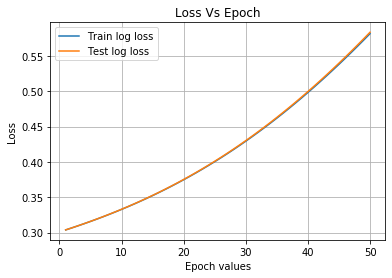

In [46]:
import matplotlib.pyplot as plt
epoch = np.arange(1,51)
plt.plot(epoch,train_log_loss_full,label="Train log loss")
plt.plot(epoch,test_log_loss_full,label="Test log loss")
plt.legend()
plt.xlabel("Epoch values")
plt.ylabel("Loss")
plt.title("Loss Vs Epoch")
plt.grid()
plt.show()

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [0]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

37500